<a href="https://www.kaggle.com/code/sandhyakrishnan02/deutsche-bank-stock-prediction-using-lstm?scriptVersionId=117822245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook is used for analyse stock price of Deutsche Bank for EQUITY NYQ, GER and FRA and to predict the close price of EQUITY - NYQ.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DB.csv')
df_germany = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DBK.DE.csv')
df_france = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DBK.F.csv')
display_html(f"<h3><br/>Equity-NYQ-Last 10 days['currency USD']", raw=True)
display(df.tail(10).style.background_gradient(cmap='coolwarm'))
display_html(f"<h3><br/>Equity-GER-Last 10 days['currency Euro']", raw=True)
display(df_germany.tail(10).style.background_gradient(cmap='coolwarm'))
display_html(f"<h3><br/>Equity-FRA-Last 10 days['currency Euro']", raw=True)
display(df_france.tail(10).style.background_gradient(cmap='coolwarm'))

Equity-NYQ-Last 10 days['currency USD']

,Date,Open,High,Low,Close,Adj Close,Volume
3278,07-12-2021,12.720000,12.890000,12.710000,12.790000,12.521537,3676000
3279,08-12-2021,12.850000,12.950000,12.690000,12.900000,12.629228,4174500
3280,09-12-2021,12.520000,12.560000,12.420000,12.430000,12.169094,3186900
3281,10-12-2021,12.410000,12.430000,12.310000,12.410000,12.149513,1749600
3282,13-12-2021,12.340000,12.360000,12.170000,12.200000,11.943921,2282300
3283,14-12-2021,12.290000,12.500000,12.280000,12.310000,12.051613,2821900
3284,15-12-2021,12.310000,12.330000,12.160000,12.230000,11.973291,2770900
3285,16-12-2021,12.560000,12.600000,12.390000,12.450000,12.188673,2807500
3286,30-09-2022,7.380000,7.530000,7.340000,7.400000,7.400000,6886100
3287,04-10-2022,7.770000,8.160000,7.760000,8.140000,8.140000,9667400


Equity-GER-Last 10 days['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
3307,06-12-2021,10.980000,11.216000,10.936000,11.174000,10.938560,11810118
3308,07-12-2021,11.174000,11.174000,11.174000,11.174000,10.938560,0
3309,08-12-2021,11.384000,11.480000,11.138000,11.408000,11.167629,8235012
3310,09-12-2021,11.270000,11.296000,11.000000,11.022000,10.789762,9418780
3311,10-12-2021,10.960000,11.044000,10.890000,10.920000,10.689912,6477812
3312,13-12-2021,10.980000,11.026000,10.788000,10.806000,10.578314,5573870
3313,14-12-2021,10.870000,11.054000,10.808000,10.930000,10.699701,7452098
3314,15-12-2021,10.982000,11.014000,10.802000,10.836000,10.607682,5690290
3315,16-12-2021,10.960000,11.174000,10.956000,11.058000,10.825004,10207690
3316,17-12-2021,11.000000,11.060000,10.818000,10.930000,10.699701,15850322


Equity-FRA-Last 10 days['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
3305,09-01-2023,11.600000,11.762000,11.554000,11.554000,11.554000,40398
3306,10-01-2023,11.610000,11.730000,11.572000,11.710000,11.710000,19246
3307,11-01-2023,11.762000,11.804000,11.670000,11.762000,11.762000,52938
3308,12-01-2023,11.760000,11.854000,11.710000,11.770000,11.770000,36811
3309,13-01-2023,11.772000,11.818000,11.556000,11.692000,11.692000,23962
3310,16-01-2023,11.710000,11.902000,11.710000,11.890000,11.890000,62516
3311,17-01-2023,11.838000,12.004000,11.788000,11.948000,11.948000,35641
3312,18-01-2023,11.956000,12.012000,11.870000,11.926000,11.926000,46887
3313,19-01-2023,11.880000,11.978000,11.650000,11.784000,11.784000,59156
3314,20-01-2023,11.820000,12.064000,11.818000,11.926000,11.926000,40954


# Equity-NYQ

In [3]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,26.531006,26.780780,26.240700,26.519916,23.739959,3709706.015207
std,17.334913,17.496123,17.134398,17.327147,14.277242,3363252.818763
min,5.030000,5.680000,4.990000,5.480000,5.364974,0.000000
25%,11.460000,11.560000,11.347500,11.467500,11.187500,1606798.500000
50%,18.820000,18.990000,18.665000,18.825000,17.831339,2904600.000000
75%,40.956583,41.347806,40.534351,40.954197,35.854843,4725475.000000
max,77.519081,78.406487,77.395035,77.977097,64.499596,70176200.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3288 non-null   object 
 1   Open       3288 non-null   float64
 2   High       3288 non-null   float64
 3   Low        3288 non-null   float64
 4   Close      3288 non-null   float64
 5   Adj Close  3288 non-null   float64
 6   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.9+ KB


None

# Equity-GER

In [4]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_germany.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_germany.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000
mean,19.168322,19.435581,18.871185,19.153191,17.254509,11821393.615014
std,10.191341,10.309209,10.051469,10.186300,8.290787,7100444.665373
min,4.868500,5.100000,4.448500,4.871000,4.768366,0.000000
25%,10.130000,10.256000,9.950000,10.122000,9.905000,7358036.000000
50%,15.966955,16.174999,15.721516,15.940000,15.080497,10055026.000000
75%,27.904234,28.301407,27.436043,27.887209,24.652910,14199387.000000
max,46.410923,47.032326,45.944874,46.900276,38.292820,111008927.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3317 non-null   object 
 1   Open       3317 non-null   float64
 2   High       3317 non-null   float64
 3   Low        3317 non-null   float64
 4   Close      3317 non-null   float64
 5   Adj Close  3317 non-null   float64
 6   Volume     3317 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.5+ KB


None

# Equity-FRA

In [5]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_france.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_france.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,19.159699,19.424523,18.857682,19.140866,17.259250,97037.505882
std,10.171782,10.290507,10.035675,10.165797,8.295043,93688.637047
min,4.903000,5.070000,4.468000,4.947000,4.843431,0.000000
25%,10.156000,10.266000,9.967000,10.125000,9.901973,40921.500000
50%,15.977000,16.150000,15.728000,15.941175,15.089441,68486.000000
75%,27.833224,28.301981,27.388699,27.811096,24.643358,119253.000000
max,46.261791,46.842484,45.797241,46.710861,38.567959,1113323.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3315 non-null   object 
 1   Open       3315 non-null   float64
 2   High       3315 non-null   float64
 3   Low        3315 non-null   float64
 4   Close      3315 non-null   float64
 5   Adj Close  3315 non-null   float64
 6   Volume     3315 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.4+ KB


None

# Visualization of Adj Close and Volume

## Adj Close

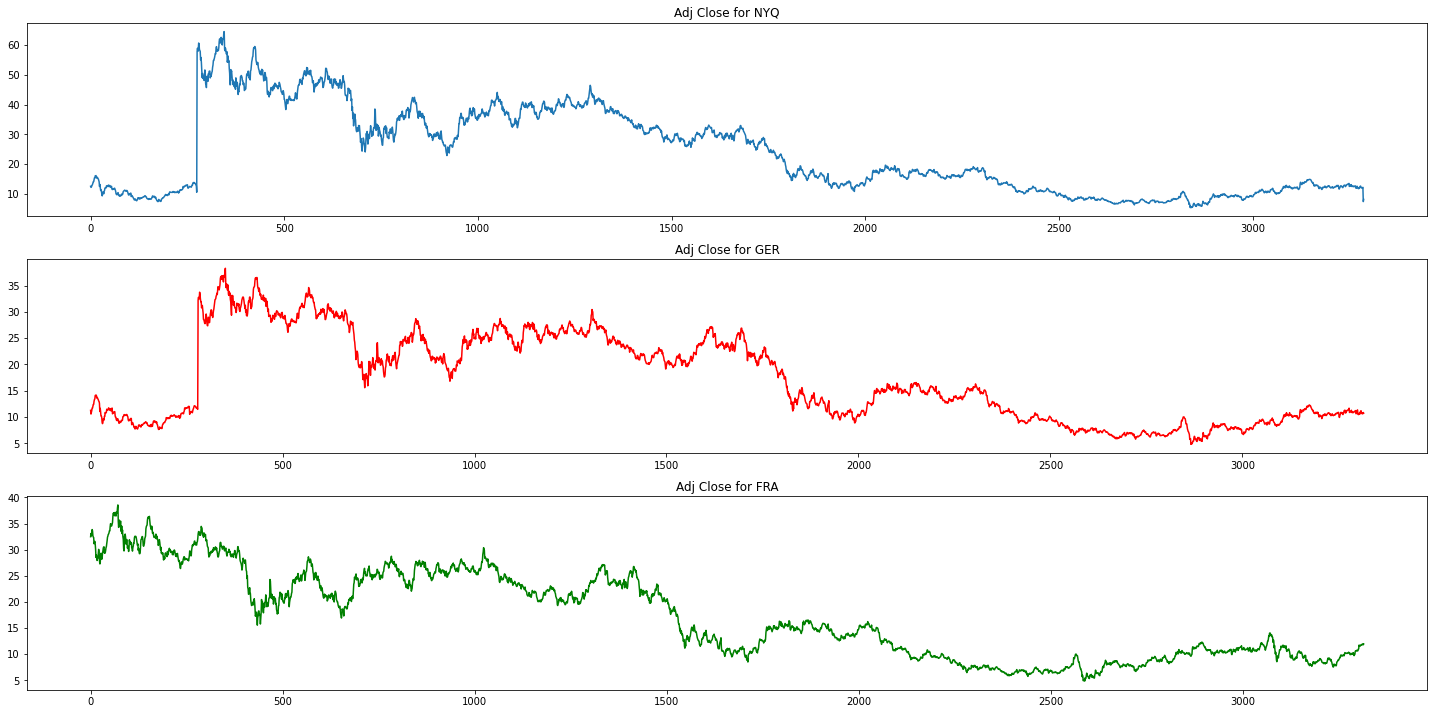

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Adj Close'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Adj Close for NYQ')
df_germany['Adj Close'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Adj Close for GER')
df_france['Adj Close'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Adj Close for FRA')
fig.tight_layout(pad = 1)

## Volume 

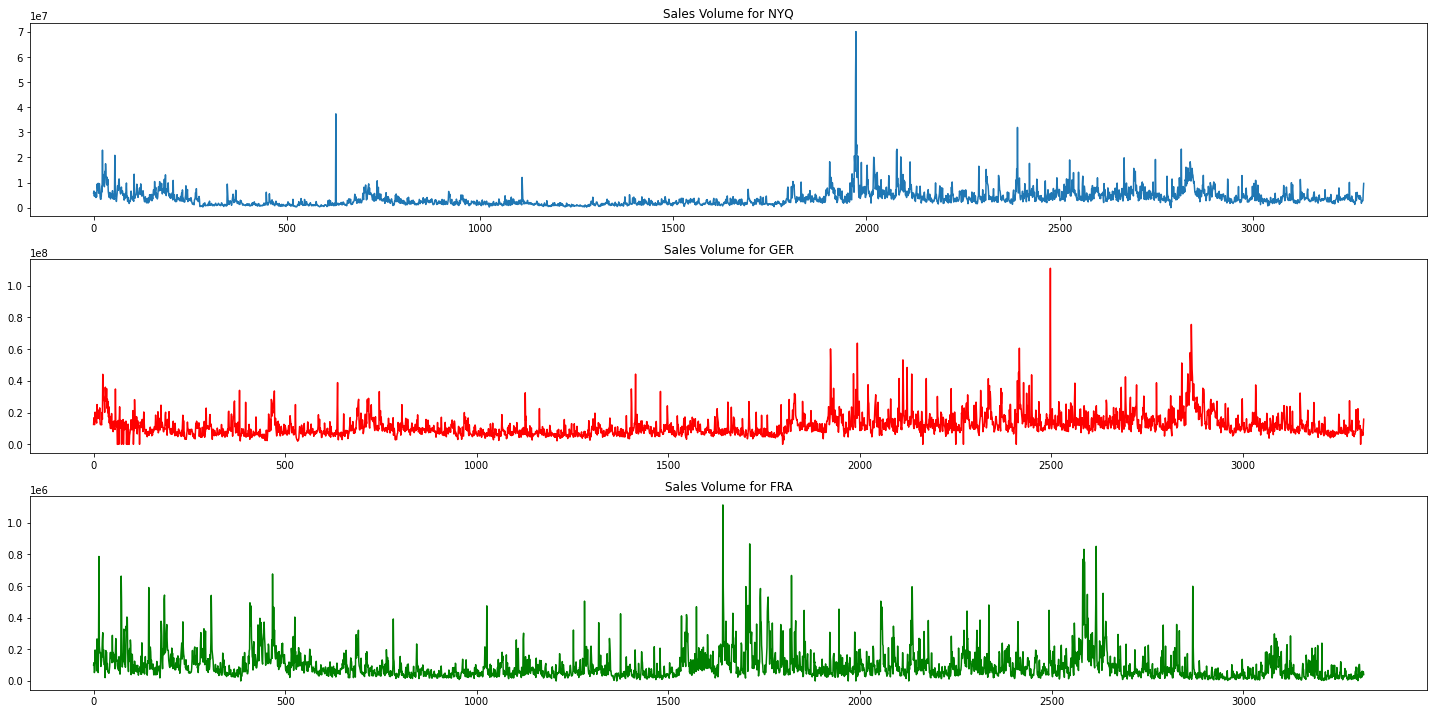

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Volume'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Sales Volume for NYQ')
df_germany['Volume'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Sales Volume for GER')
df_france['Volume'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Sales Volume for FRA')
fig.tight_layout(pad = 1)

# Moving Average 

A trend is a pattern, which shows the movement of data with respect to time. It can be measured by using Freehand Graphical Method, Method of selected points, Method of semi-averages, Method of moving averages, Method of Least Squares.

The method of moving average is based on the principle that the total effect of periodic variations at different points of time completely neutralizes. It uses the average of a number of adjoining data points or periods, the average is calculated by overlapping observations and it highlights the long-term trends in time series while capturing short-term fluctuations. Time series prediction model such as ARIMA uses moving average for prediction.



Simple Moving Average (SMA)
SMA is the unweighted mean of the previous k data points. If p1, p2…, pn are the time series data point and the mean over the last k data-points is denoted as SMAk then it can be calculated as:


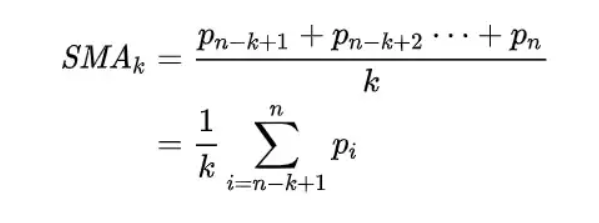

Here the same sampling width of k is the range from (n-k+1) to n. When calculating SMA for the next k data points the width of k will be from range (n-k+2) to (n+1) and a new value p(n+1) comes into the picture and p(n-k+1) drops out. SMA for next k values can be summarized with previous

SMA can be implemented by using pandas.DataFrame.rolling() function is used to calculate the moving average over a fixed window.

General Syntax for the rolling function is

DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method=’single’)

Where the window will be a fixed size and it is the number of observations used for calculating the statistic. Other values if not provided will take the default values.

The rolling average creates a subset from the complete series with the size of the window value, which will be the first moving average. Then the subset is changed by moving forward to the next subset with window size.

Here Moving Average is taken for 10, 30, and 60 days.

In [8]:
Moving_Average = [10,30,60]

for i in Moving_Average:
    col_name = f"Moving Average for {i} days"
    df[col_name] = df['Adj Close'].rolling(i).mean()
    df_germany[col_name] = df_germany['Adj Close'].rolling(i).mean()
    df_france[col_name] = df_france['Adj Close'].rolling(i).mean()

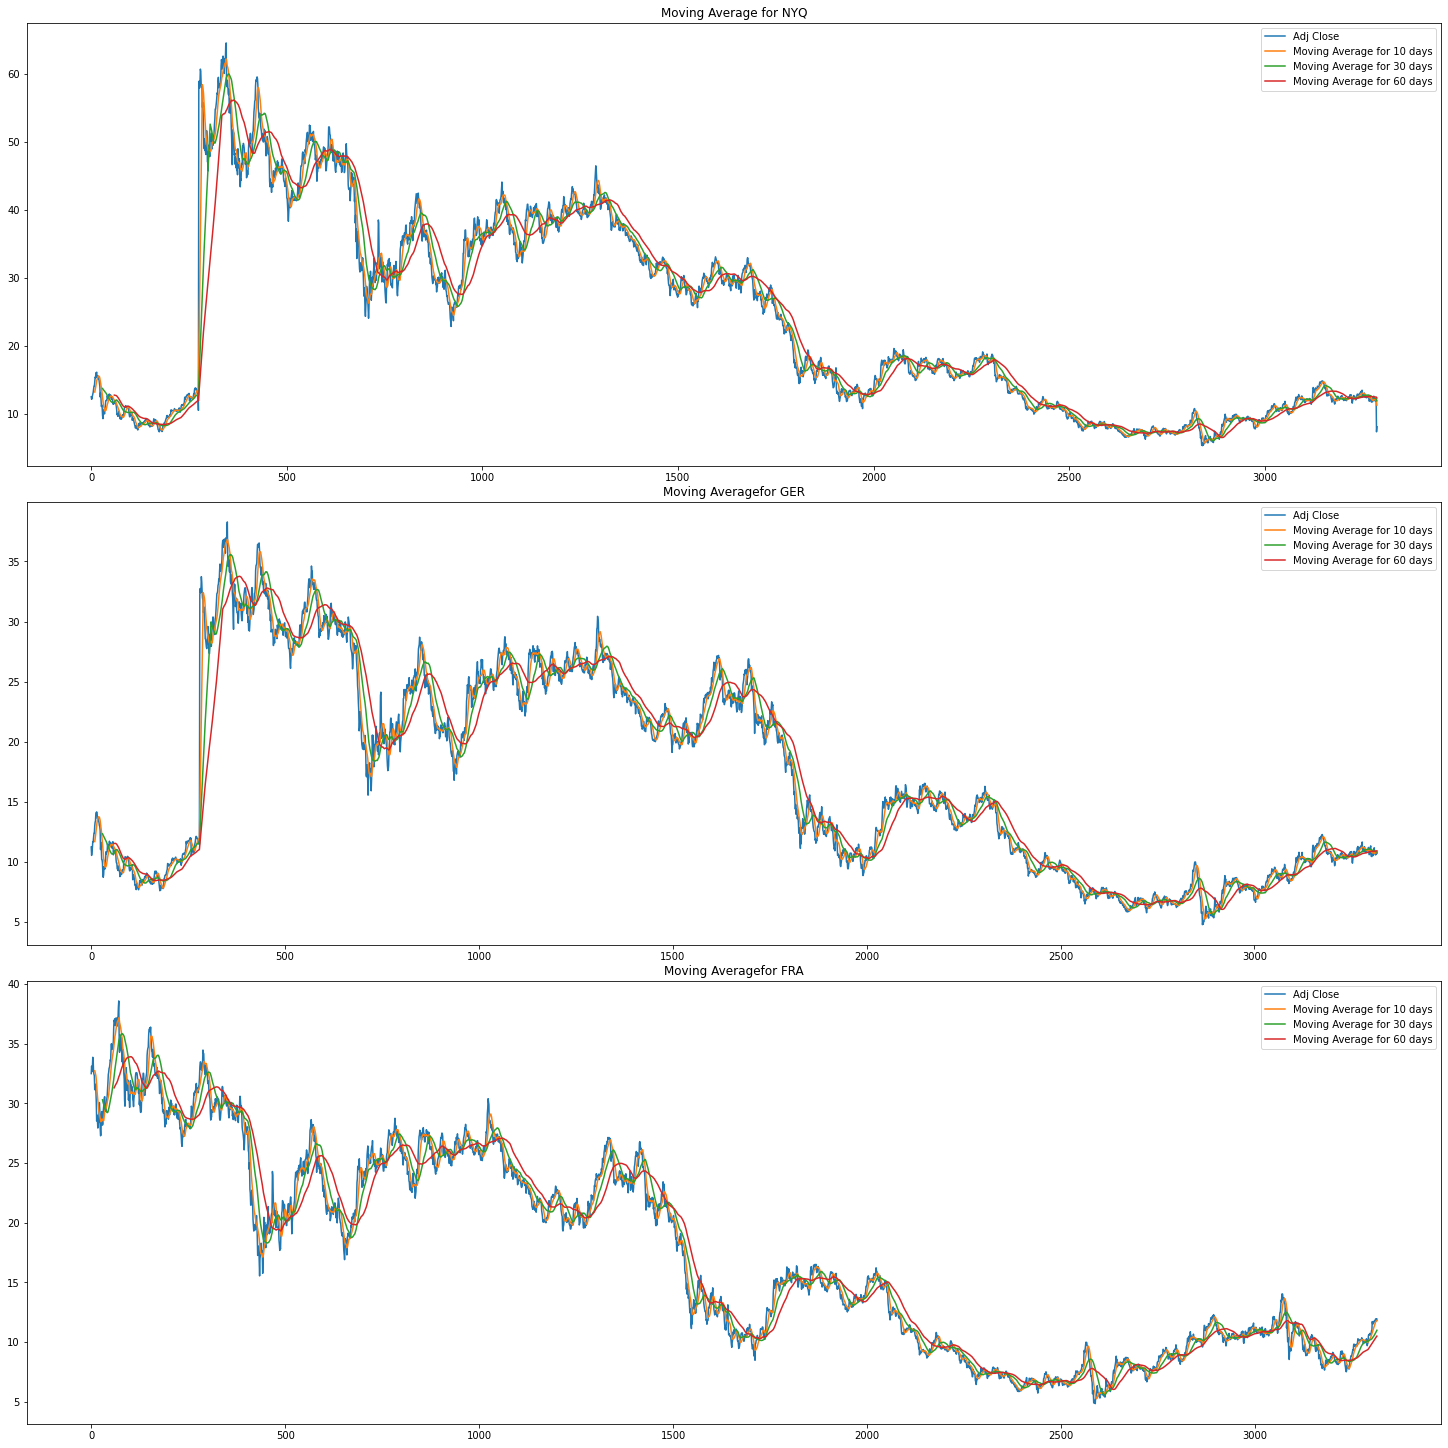

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[0],figsize=(20,20))
ax[0].set_title('Moving Average for NYQ')
df_germany[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[1],figsize=(20,20))
ax[1].set_title('Moving Averagefor GER')
df_france[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[2],figsize=(20,20))
ax[2].set_title('Moving Averagefor FRA')
fig.tight_layout(pad = 0.3)

# Percentage Change for each day

pct_change to find the percent change for each day

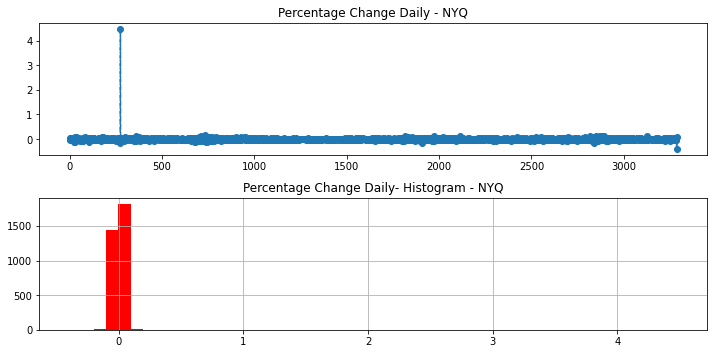

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - NYQ')
df['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - NYQ')

fig.tight_layout(pad = 1)

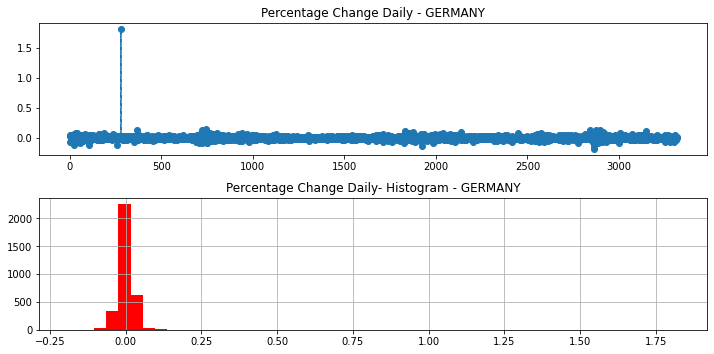

In [11]:
df_germany['Daily Return'] = df_germany['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_germany['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - GERMANY')
df_germany['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - GERMANY')

fig.tight_layout(pad = 1)

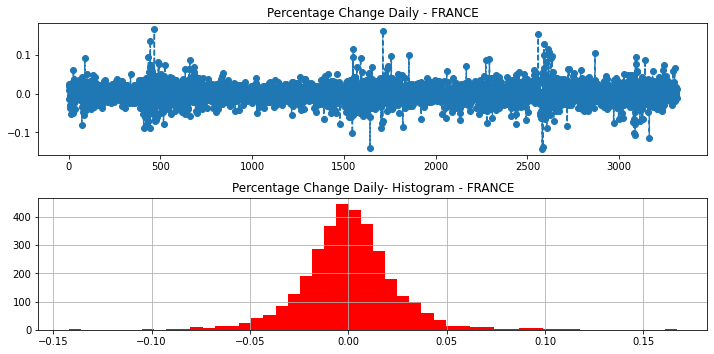

In [12]:
df_france['Daily Return'] = df_france['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_france['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - FRANCE')
df_france['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - FRANCE')

fig.tight_layout(pad = 1)

# Close Price

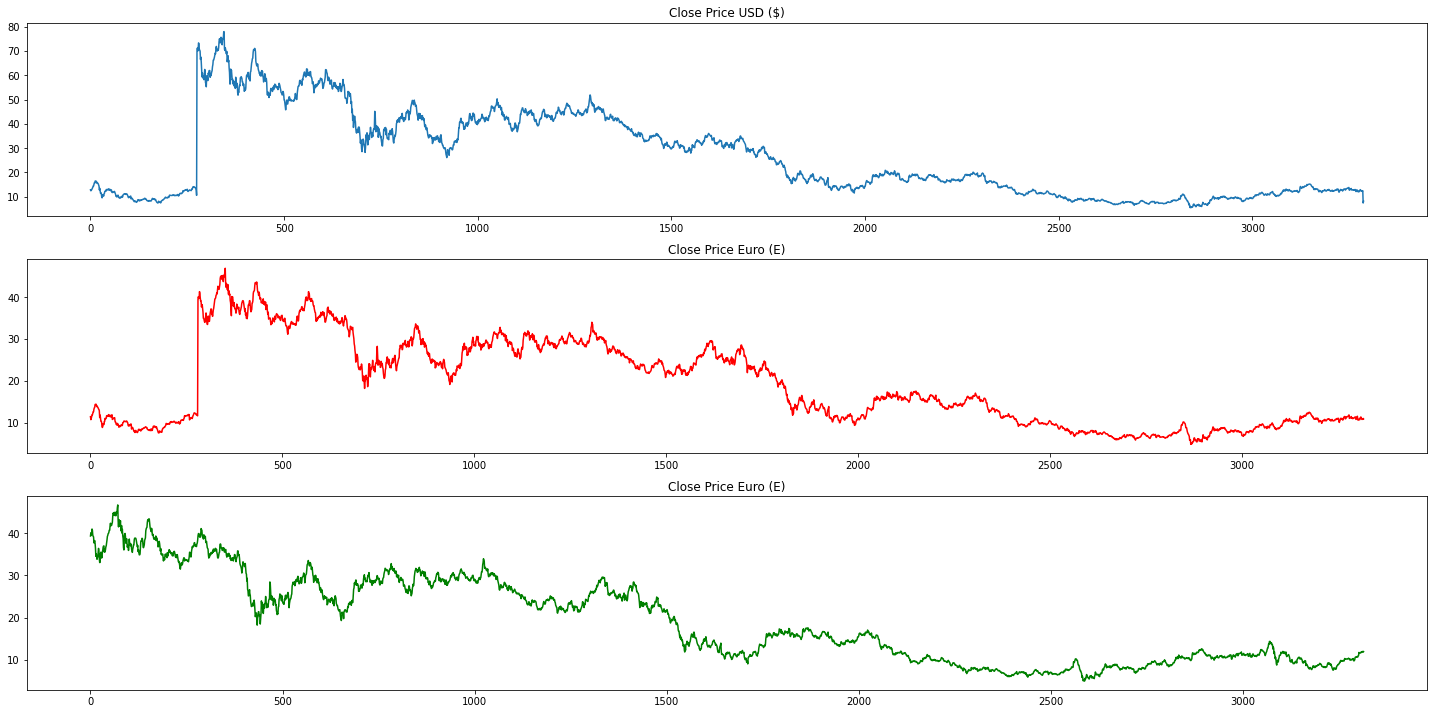

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Close'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Close Price USD ($)')
df_germany['Close'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Close Price Euro (E)')
df_france['Close'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Close Price Euro (E)')
fig.tight_layout(pad = 1)

# Data Scaling for EQUITY- NYQ

In [14]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len, ' is the training length')

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

3124  is the training length
[array([0.1011075 , 0.09586591, 0.09807289, 0.10290067, 0.10621115,
       0.11048718, 0.11600464, 0.12290147, 0.12317735, 0.13297084,
       0.14166084, 0.14041942, 0.15090259, 0.15048877, 0.15200609,
       0.14097116, 0.14000561, 0.14441958, 0.14193672, 0.13752275,
       0.13559164, 0.12938449, 0.12248766, 0.10055575, 0.1097975 ,
       0.09586591, 0.0811067 , 0.08441717, 0.0784859 , 0.06207145,
       0.05586431, 0.06551986, 0.0743478 , 0.07255463, 0.06579574,
       0.07793416, 0.08124463, 0.0928313 , 0.09365892, 0.09379686,
       0.09338305, 0.10345242, 0.09931432, 0.10027988, 0.10221099,
       0.10248686, 0.10690083, 0.10276274, 0.09890051, 0.10510766,
       0.10428004, 0.10083162, 0.09600384, 0.09862464, 0.1011075 ,
       0.0897967 , 0.0856586 , 0.08883114, 0.08648622, 0.08745178])]
[0.08896907968604591]

[array([0.1011075 , 0.09586591, 0.09807289, 0.10290067, 0.10621115,
       0.11048718, 0.11600464, 0.12290147, 0.12317735, 0.13297084,
      

# Model Creation for EQUITY- NYQ

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-01-31 12:16:13.080115: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-31 12:16:13.737015: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3064/3064 [==============================] - 117s 37ms/step - loss: 0.0016


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.7958454010396823

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


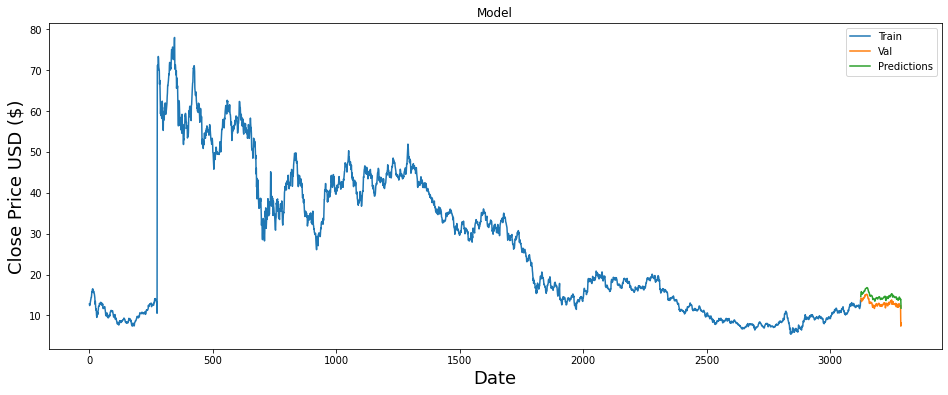

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

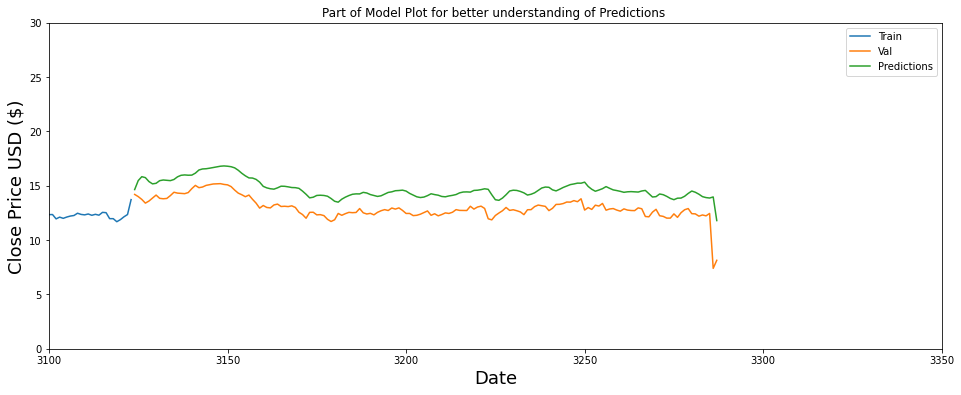

In [18]:
plt.figure(figsize=(16,6))
plt.title('Part of Model Plot for better understanding of Predictions ')
plt.xlabel('Date', fontsize=18);plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xlim(3100,3350);plt.ylim(0,30)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# Close Price Prediction for EQUITY- NYQ

In [19]:
# Show the valid and predicted prices
pd.set_option('display.max_rows', None)
valid

,Close,Predictions
3124,14.20,14.644869
3125,14.00,15.471208
3126,13.74,15.831007
3127,13.40,15.745739
3128,13.59,15.383311
3129,13.87,15.170290
3130,14.14,15.222600
3131,13.84,15.463902
3132,13.80,15.527003
3133,13.83,15.496832


https://github.com/SandKrish/TimeSeries

Read more about timeseries:

https://medium.com/codex/simple-moving-average-and-exponentially-weighted-moving-average-with-pandas-57d4a457d363

https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b

https://medium.com/codex/time-series-data-decomposition-b51819f15e23
